In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train_df=pd.read_csv("cs-training.csv")
test_df= pd.read_csv("cs-test.csv")

In [3]:
print(train_df.columns)
print(test_df.columns)


Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')
Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


In [4]:
train_df.drop(['Unnamed: 0'],axis=1,inplace=True)
test_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
#Imputing missing values
train_df["MonthlyIncome"].fillna(train_df['MonthlyIncome'].median(),inplace=True)
test_df["MonthlyIncome"].fillna(test_df['MonthlyIncome'].median(),inplace=True)

In [6]:
print(train_df.isna().sum())
print("--------------------------------------")
print(test_df.isna().sum())

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      3924
dtype: int64
--------------------------------------
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNo

In [7]:
train_df["NumberOfDependents"].fillna(train_df['NumberOfDependents'].median(),inplace=True)
test_df["NumberOfDependents"].fillna(test_df['NumberOfDependents'].median(),inplace=True)

In [8]:
print(train_df.isna().sum())
print("--------------------------------------")
print(test_df.isna().sum())

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64
--------------------------------------
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependen

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [10]:
predictor_var=train_df[[
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']]



In [11]:
response_var=train_df[['SeriousDlqin2yrs']]

In [12]:
test_var=test_df[['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']]

### Decision Tree

In [13]:
model=DecisionTreeClassifier(random_state=20)

In [14]:
model.fit(predictor_var,response_var)

DecisionTreeClassifier(random_state=20)

In [15]:
test_pred=model.predict(test_var)

In [16]:
actual=pd.read_csv("sampleEntry.csv")
actual.drop('Id',axis=1,inplace=True)
actual['Probability']=actual['Probability'].apply(lambda x: 0 if x<0.5 else 1)
actual.head()

,Probability
0,0
1,0
2,0
3,0
4,0


In [17]:
actual['Probability']=actual['Probability'].apply(lambda x: 0 if x<0.5 else 1)

In [18]:
accuracy = accuracy_score(test_pred,actual)

In [19]:
# Evaluate the model
accuracy = accuracy_score(actual, test_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(actual, test_pred))

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96     99798
           1       0.14      0.62      0.23      1705

    accuracy                           0.93    101503
   macro avg       0.57      0.78      0.60    101503
weighted avg       0.98      0.93      0.95    101503



In [20]:
from sklearn.tree import plot_tree

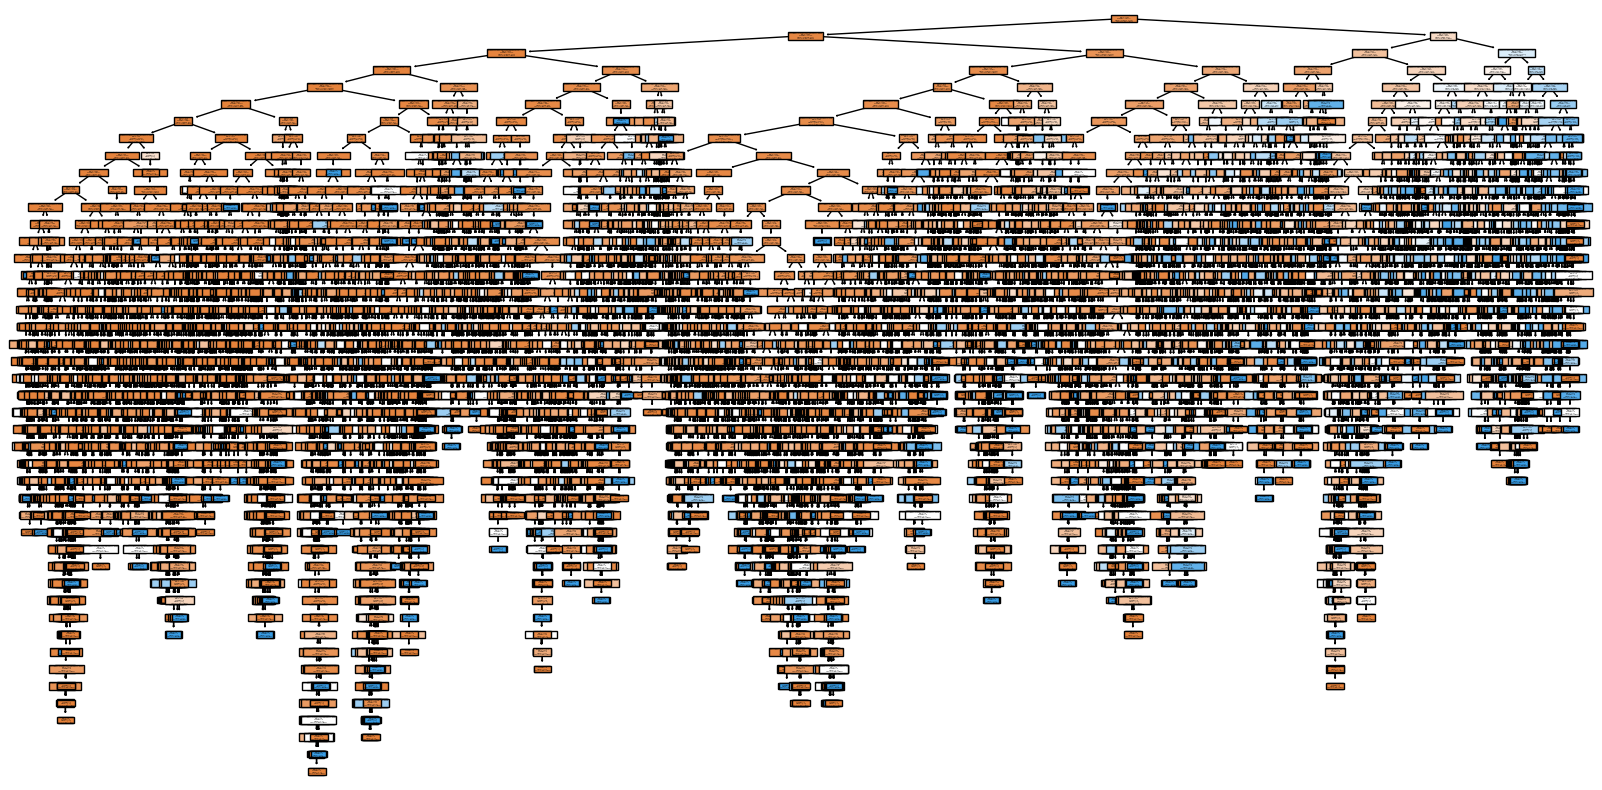

In [21]:
# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=predictor_var.columns, class_names=["No Delinquency", "Delinquency"], filled=True)
plt.show()

In [22]:
# Display feature importance
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': predictor_var.columns, 'importance': importances})
print(feature_importances.sort_values(by='importance', ascending=False))

                                feature  importance
3                             DebtRatio    0.197274
0  RevolvingUtilizationOfUnsecuredLines    0.197175
4                         MonthlyIncome    0.148208
6               NumberOfTimes90DaysLate    0.128727
1                                   age    0.121029
5       NumberOfOpenCreditLinesAndLoans    0.084476
9                    NumberOfDependents    0.036923
2  NumberOfTime30-59DaysPastDueNotWorse    0.036649
7          NumberRealEstateLoansOrLines    0.027050
8  NumberOfTime60-89DaysPastDueNotWorse    0.022488


### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
from sklearn.metrics import accuracy_score, classification_report

In [25]:
from sklearn.tree import plot_tree

In [26]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=50)

In [27]:
rf_model.fit(predictor_var,response_var)

d:\AppInstallationBin\Anaconda\NewFolder\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=50)

In [28]:
test_response=rf_model.predict(test_var)


In [29]:
accuracy = accuracy_score(actual, test_response)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(actual, test_response))

Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     99798
           1       0.61      0.82      0.70      1705

    accuracy                           0.99    101503
   macro avg       0.80      0.91      0.85    101503
weighted avg       0.99      0.99      0.99    101503



In [30]:
# Display feature importance
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'feature': predictor_var.columns, 'importance': importances})
print(feature_importances.sort_values(by='importance', ascending=False))

                                feature  importance
0  RevolvingUtilizationOfUnsecuredLines    0.193248
3                             DebtRatio    0.180483
4                         MonthlyIncome    0.146412
1                                   age    0.126704
6               NumberOfTimes90DaysLate    0.094175
5       NumberOfOpenCreditLinesAndLoans    0.088589
2  NumberOfTime30-59DaysPastDueNotWorse    0.049604
8  NumberOfTime60-89DaysPastDueNotWorse    0.044971
9                    NumberOfDependents    0.042272
7          NumberRealEstateLoansOrLines    0.033542
